# Motivation

![New York City schoolbus](https://images.unsplash.com/photo-1550523049-a61d0deec4a4?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwcm9maWxlLXBhZ2V8MTAwfHx8ZW58MHx8fHx8)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

# The Data

DataCamp published a single dataset to use. A summary and preview are provided below.

## `schools.csv`

| Column     | Description              |
|------------|--------------------------|
| `'school_name'` |  |
| `'borough'` |  |
| `'building_code'` |  |
| `'average_math'` |  |
| `'average_reading'` |  |
| `'average_writing'` |  |
| `'percent_tested'` |  |

```csv
school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
"New Explorations into Science, Technology and Math High School",Manhattan,M022,657,601,601,
Essex Street Academy,Manhattan,M445,395,411,387,78.9
Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
```

# Analysis Questions

-   Which NYC schools have the best math results? 
    -   (the best math results are at least 80% of the *maximum possible score of 800* for math)

-   What are the top 10 performing schools based on the combined SAT scores?

-   Which single borough has the largest standard deviation in the combined SAT score?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

schools = pd.read_csv(r"D:\Courses\DataCamp\Associate Data Scientist in Python\Courses' Datasets\schools.csv")
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


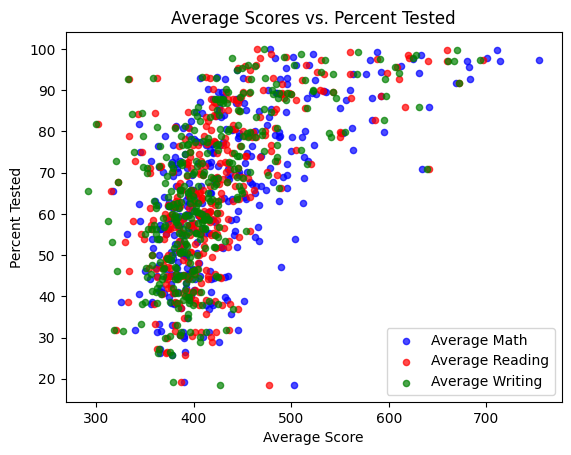

In [2]:
fig, ax = plt.subplots()

schools.plot(x="average_math", y="percent_tested", kind="scatter", ax=ax, color="blue", label="Average Math", alpha=0.7)
schools.plot(x="average_reading", y="percent_tested", kind="scatter", ax=ax, color="red", label="Average Reading", alpha=0.7)
schools.plot(x="average_writing", y="percent_tested", kind="scatter", ax=ax, color="green", label="Average Writing", alpha=0.7)

# OR: plt.legend(["Average Math", "Average Reading", "Average Writing"])

ax.set_xlabel("Average Score")
ax.set_ylabel("Percent Tested")
ax.set_title("Average Scores vs. Percent Tested")

plt.show()

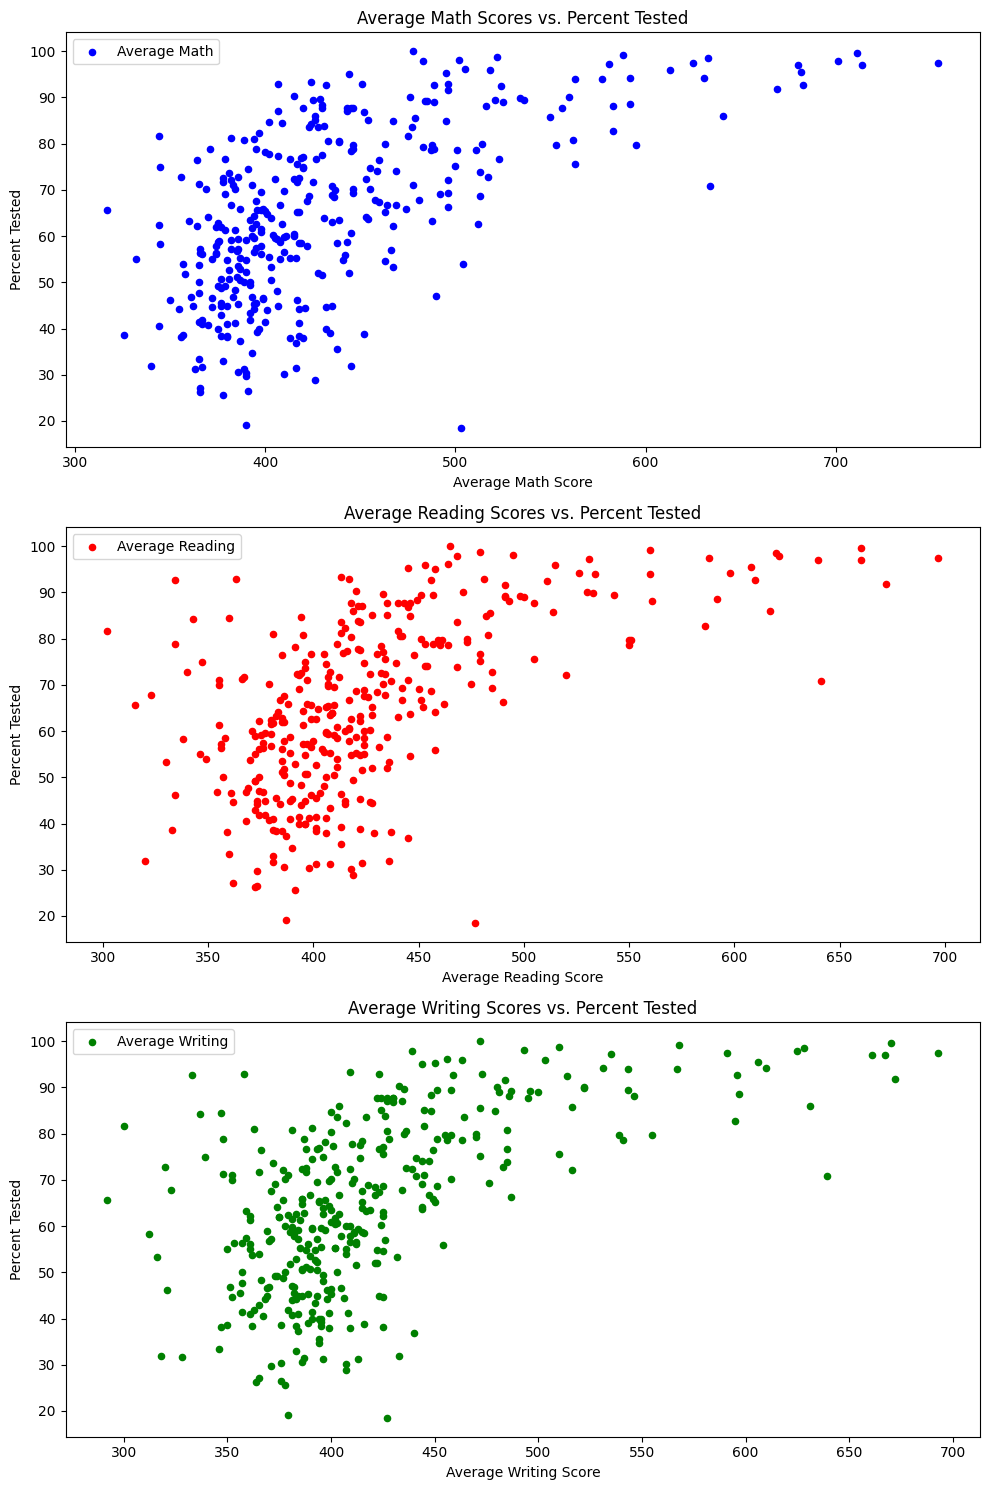

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))

# Plot for Math scores
schools.plot(x="average_math", y="percent_tested", 
                                         kind="scatter", ax=ax1, color="blue", 
                                         label="Average Math")
ax1.set_xlabel("Average Math Score")
ax1.set_ylabel("Percent Tested")
ax1.set_title("Average Math Scores vs. Percent Tested")

# Plot for Reading scores
schools.plot(x="average_reading", y="percent_tested", 
                                            kind="scatter", ax=ax2, color="red", 
                                            label="Average Reading")
ax2.set_xlabel("Average Reading Score")
ax2.set_ylabel("Percent Tested")
ax2.set_title("Average Reading Scores vs. Percent Tested")

# Plot for Writing scores
schools.plot(x="average_writing", y="percent_tested", 
                                            kind="scatter", ax=ax3, color="green", 
                                            label="Average Writing")
ax3.set_xlabel("Average Writing Score")
ax3.set_ylabel("Percent Tested")
ax3.set_title("Average Writing Scores vs. Percent Tested")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

###   Which NYC schools have the best math results? 
-   The best math results are at least 80% of the *maximum possible score of 800* for math

In [4]:
best_math_schools = schools.loc[schools["average_math"] >= int(0.8*800), ["school_name", "average_math"]].\
                    sort_values("average_math", ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


### What are the top 10 performing schools based on the combined SAT scores?

In [5]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
top_10_schools = schools[["school_name", "total_SAT"]]
top_10_schools = top_10_schools.sort_values("total_SAT", ascending=False).iloc[:10] # OR .head(10)
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


### Which single borough has the largest standard deviation in the combined SAT score?

In [8]:
grouped_by_borough = schools.groupby("borough")
num_schools = grouped_by_borough["school_name"].count()
average_SAT = grouped_by_borough["total_SAT"].mean().round(2)
std_SAT = grouped_by_borough["total_SAT"].std().round(2)

largest_std_dev = pd.DataFrame({
    "num_schools": num_schools,
    "average_SAT": average_SAT,
    "std_SAT": std_SAT
})

largest_std_dev = largest_std_dev.sort_values("std_SAT", ascending=False).reset_index().iloc[[0]]
largest_std_dev

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29


In [ ]:
## OR: 
""" DataCamp Solution for the Previous Cell

# Which NYC borough has the highest standard deviation for total_SAT?
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)

# Filter for max std and make borough a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

# Optional: Move borough from index to column
largest_std_dev.reset_index(inplace=True)
"""